## <center> Аттестация. Практическое задание в Jupyter

В данном блоке вам предстоит решить задачу, которую автор когда-то решал на одном из своих собеседований.
Вам предоставлена таблица с данными (скачать файл можно на платформе) о ежедневной выработке энергии солнечными батареями. Информация в ней содержится в двух столбцах: 
* date - дата наблюдения
* cum_power - накопленная (кумулятивная) выработка энергии на указанный день

То есть перед вами классический пример временного ряда: числовой показатель, зависящий от времени. Давайте с ним поработаем.


In [82]:
import pandas as pd
import numpy as np

1. В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями: </p>
    $$x^*_i  = \frac{x_{i-1} + x_{i+1}}{2}$$ 
    
Совет: проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power, но вы можете предложить более изящное решение.


In [83]:
# Read the file to DataFrame
df_sol = pd.read_csv('data/solarpower.csv')

# Look at emptiy cells
mask = df_sol['cum_power'] < 0
display(df_sol[mask]) 

# Replace the empty cells
for i in range(df_sol.shape[0]):
    if df_sol['cum_power'].iloc[i] == -1:
        df_sol['cum_power'].iloc[i] = (df_sol['cum_power'].iloc[i+1] + df_sol['cum_power'].iloc[i-1])/2
     

,date,cum_power
45,2017-02-15,-1.0
647,2018-10-10,-1.0


/home/freeradical/anaconda3/envs/sf/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2. Теперь, когда таблица заполнена, создайте столбец day_power - ежедневный прирост выработки солнечной энергии.

    После чего создайте данные о ежемесячной выработке энергии на каждый год. 
    
Совет: для того, чтобы выделить из даты год и месяц проще всего воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды, в данном случае 'М' - месяц.

In [84]:
# Make new feature
df_sol['day_power'] = df_sol['cum_power'].diff()

df_sol['date'] = pd.to_datetime(df_sol['date'])

df_sol['period'] = df_sol['date'].dt.to_period('M')


3. Постройте график временного ряда - ежемесячной выработки солнечной энергии. Не забудьте подписать оси и сам график.
Укажите в какие сезоны наблюдается подъем, а в какие спад?

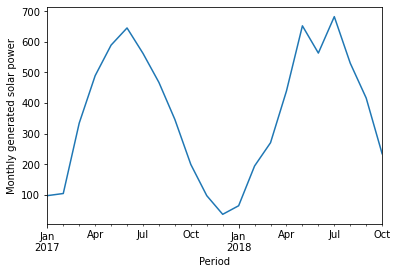

In [85]:
# Draw the chart
new_data = df_sol.groupby('period')['day_power'].sum()
new_data.plot(kind='line',xlabel='Period', ylabel='Monthly generated solar power');

На построенном графике наблюдаем сезонные подъемы и спады в выработке энергии, что связано с увеличием количества солнечного света и его мощности летом в северном полушарии.